In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
sci_df = pd.read_excel("../data/raw/scientsbank.xlsx")
sci_df = sci_df.drop(columns=['id', 'dataset', 'question_id'])
sci_df.head()

,question,real_answer,answer,score,correct,Alfonso,Emiliano
0,Look at the picture on the right. Label the po...,Like poles repel and opposite poles attract.,Because they are repelling each other always.,0.0,0,0,0
1,Look at the picture on the right. Label the po...,Like poles repel and opposite poles attract.,The magnets are not touching because they cann...,4.0,1,4,4
2,Look at the picture on the right. Label the po...,Like poles repel and opposite poles attract.,The magnets will maybe not stick because the f...,0.0,0,0,0
3,Look at the picture on the right. Label the po...,Like poles repel and opposite poles attract.,They are repelling.,0.0,0,0,0
4,Look at the picture on the right. Label the po...,Like poles repel and opposite poles attract.,The magnets are on the side when they repel ea...,0.0,0,0,1


In [3]:
sci_df['avg_score'] = sci_df[['score', 'Alfonso', 'Emiliano']].mean(axis=1).round(0)
sci_df['is_correct'] = np.where(sci_df['correct'] == 1, "correct", "wrong")

sci_df['prompt'] = (
    "Question: " + sci_df['question'] + "\n"
    "Reference Answer: " + sci_df['real_answer'] + "\n"
    "Student Answer: " + sci_df['answer'] + "\n"
    "Grading Rubric: 0-5 (where 0 is the lowest score and 5 is the highest).\n"
    "Scores given by experts: " + sci_df['avg_score'].astype(str) + 
    ". Student answer is " + sci_df['is_correct']
)

sci_df['prompt_length'] = sci_df['prompt'].apply(len)
sci_df.head()


,question,real_answer,answer,score,correct,Alfonso,Emiliano,avg_score,is_correct,prompt,prompt_length
0,Look at the picture on the right. Label the po...,Like poles repel and opposite poles attract.,Because they are repelling each other always.,0.0,0,0,0,0.0,wrong,Question: Look at the picture on the right. La...,463
1,Look at the picture on the right. Label the po...,Like poles repel and opposite poles attract.,The magnets are not touching because they cann...,4.0,1,4,4,4.0,correct,Question: Look at the picture on the right. La...,536
2,Look at the picture on the right. Label the po...,Like poles repel and opposite poles attract.,The magnets will maybe not stick because the f...,0.0,0,0,0,0.0,wrong,Question: Look at the picture on the right. La...,560
3,Look at the picture on the right. Label the po...,Like poles repel and opposite poles attract.,They are repelling.,0.0,0,0,0,0.0,wrong,Question: Look at the picture on the right. La...,437
4,Look at the picture on the right. Label the po...,Like poles repel and opposite poles attract.,The magnets are on the side when they repel ea...,0.0,0,0,1,0.0,wrong,Question: Look at the picture on the right. La...,473


In [4]:
sci_df['prompt_length'].describe()

count    139.000000
mean     454.640288
std       72.075042
min      335.000000
25%      387.000000
50%      465.000000
75%      513.500000
max      650.000000
Name: prompt_length, dtype: float64

In [5]:
sci_df.shape

(139, 11)

## Score distribution plot

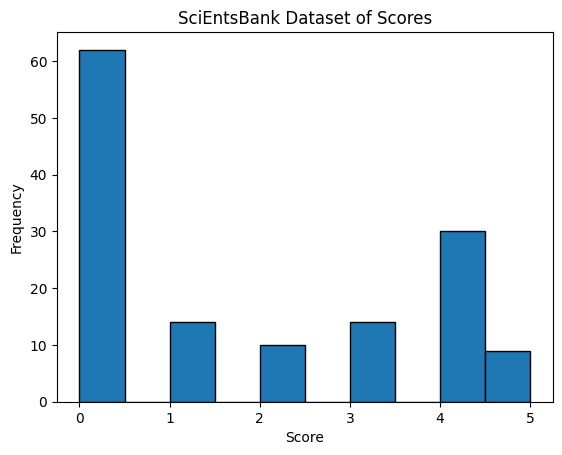

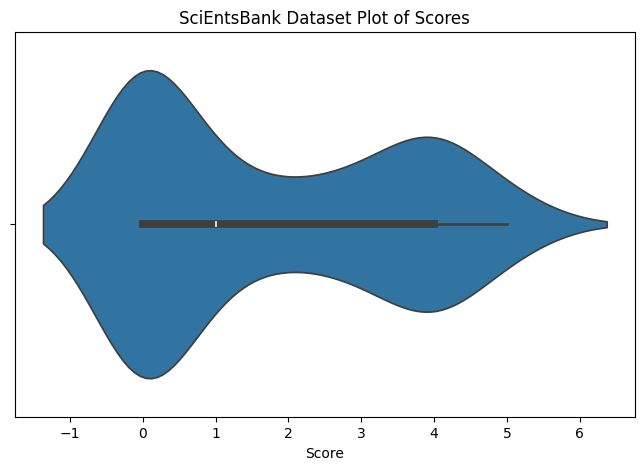

In [6]:
plt.hist(sci_df['avg_score'], bins=10, edgecolor='black')
plt.title('SciEntsBank Dataset of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 5))
sns.violinplot(x=sci_df['avg_score'])
plt.title('SciEntsBank Dataset Plot of Scores')
plt.xlabel('Score')
plt.show()


## Input Length Plot 

In [21]:
sci_df['q_length'] = sci_df['question'].apply(len)
sci_df['r_length'] = sci_df['real_answer'].apply(len)
sci_df['a_length'] = sci_df['answer'].apply(len)
print("deskripsi question")
print(sci_df['q_length'].describe())

deskripsi question
count    139.000000
mean     163.151079
std       66.048721
min       77.000000
25%       77.000000
50%      132.000000
75%      247.000000
max      247.000000
Name: q_length, dtype: float64


In [22]:
print("\ndeskripsi reference answer")
print(sci_df['r_length'].describe())
print("\ndeskripsi student answer")
print(sci_df['a_length'].describe())


deskripsi reference answer
count    139.000000
mean      49.956835
std       10.316632
min       39.000000
25%       39.000000
50%       50.000000
75%       66.000000
max       66.000000
Name: r_length, dtype: float64

deskripsi student answer
count    139.000000
mean      68.798561
std       41.831820
min        5.000000
25%       36.000000
50%       60.000000
75%       95.500000
max      230.000000
Name: a_length, dtype: float64


### Question plot

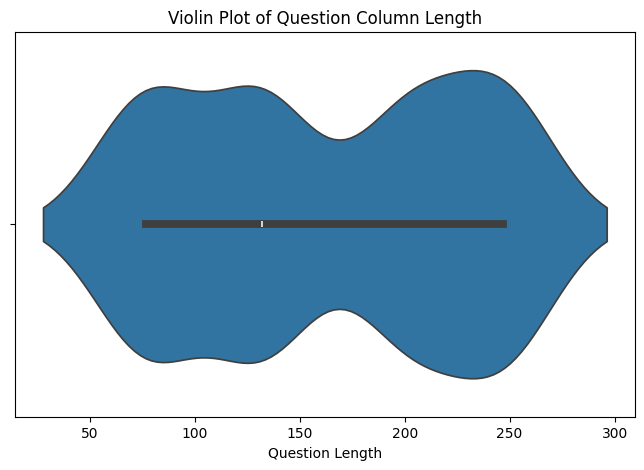

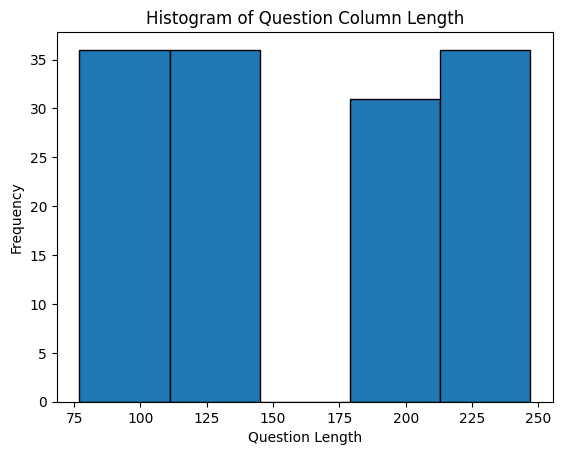

In [23]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=sci_df['q_length'])
plt.title('Violin Plot of Question Column Length')
plt.xlabel('Question Length')
plt.show()
plt.hist(sci_df['q_length'], bins=5, edgecolor='black')
plt.title('Histogram of Question Column Length')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.show()

### Reference answer plot

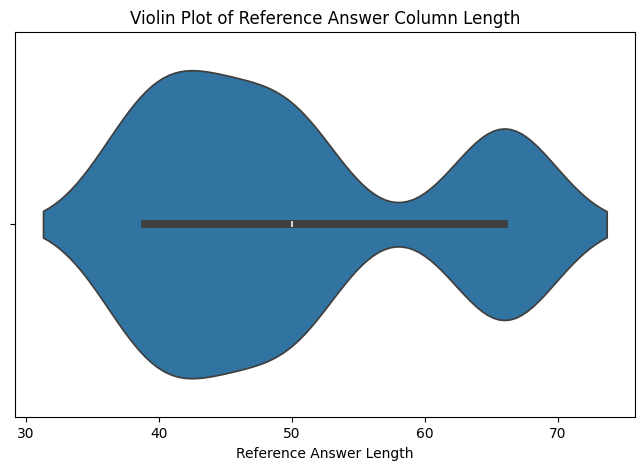

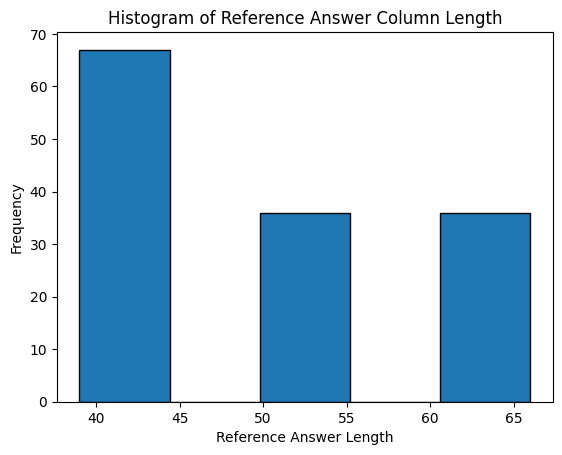

In [24]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=sci_df['r_length'])
plt.title('Violin Plot of Reference Answer Column Length')
plt.xlabel('Reference Answer Length')
plt.show()
plt.hist(sci_df['r_length'], bins=5, edgecolor='black')
plt.title('Histogram of Reference Answer Column Length')
plt.xlabel('Reference Answer Length')
plt.ylabel('Frequency')
plt.show()

### Student answer plot

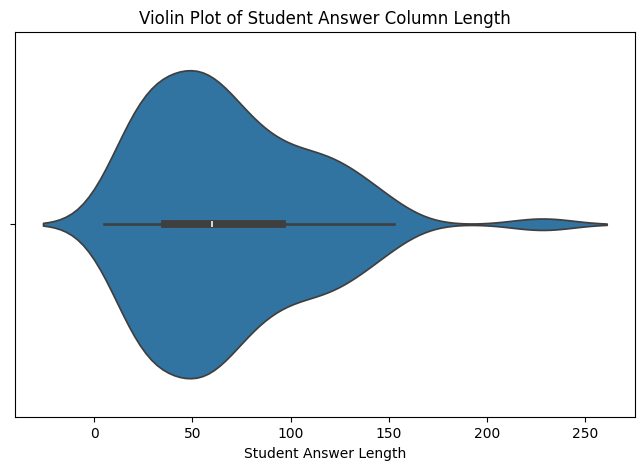

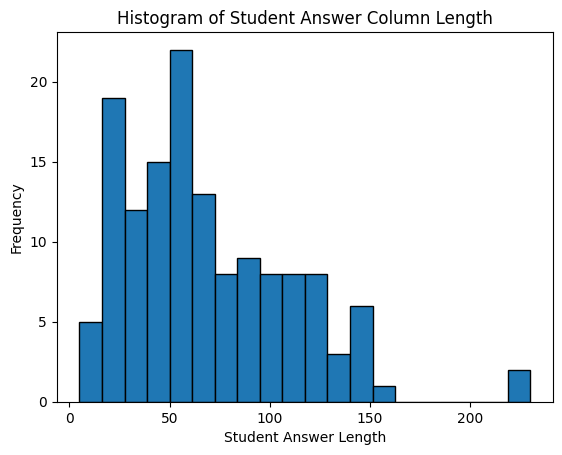

In [25]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=sci_df['a_length'])
plt.title('Violin Plot of Student Answer Column Length')
plt.xlabel('Student Answer Length')
plt.show()
plt.hist(sci_df['a_length'], bins=20, edgecolor='black')
plt.title('Histogram of Student Answer Column Length')
plt.xlabel('Student Answer Length')
plt.ylabel('Frequency')
plt.show()

In [26]:
sci_df.head()

,question,real_answer,answer,score,correct,Alfonso,Emiliano,avg_score,is_correct,prompt,prompt_length,q_length,r_length,a_length
0,Look at the picture on the right. Label the po...,Like poles repel and opposite poles attract.,Because they are repelling each other always.,0.0,0,0,0,0.0,wrong,Question: Look at the picture on the right. La...,463,202,44,45
1,Look at the picture on the right. Label the po...,Like poles repel and opposite poles attract.,The magnets are not touching because they cann...,4.0,1,4,4,4.0,correct,Question: Look at the picture on the right. La...,536,202,44,116
2,Look at the picture on the right. Label the po...,Like poles repel and opposite poles attract.,The magnets will maybe not stick because the f...,0.0,0,0,0,0.0,wrong,Question: Look at the picture on the right. La...,560,202,44,142
3,Look at the picture on the right. Label the po...,Like poles repel and opposite poles attract.,They are repelling.,0.0,0,0,0,0.0,wrong,Question: Look at the picture on the right. La...,437,202,44,19
4,Look at the picture on the right. Label the po...,Like poles repel and opposite poles attract.,The magnets are on the side when they repel ea...,0.0,0,0,1,0.0,wrong,Question: Look at the picture on the right. La...,473,202,44,55


In [27]:
sci_df = sci_df.drop(columns=['prompt', 'prompt_length', 'r_length', 'a_length', 'correct', 'is_correct', 'q_length', 'Alfonso', 'Emiliano', 'score'])
sci_df = sci_df.rename(columns={'real_answer':'reference_answer', 'avg_score':'score'})
sci_df.to_csv('data/sci.csv', index=False)

Index(['question', 'reference_answer', 'answer', 'score'], dtype='object')
